# Computer Vision. Homework #2

## Separating text from background

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
work_dir = os.getcwd()
data_dir = os.path.join(work_dir, 'data')

separate_text_img_dir = os.path.join(data_dir, 'task_1')

In [4]:
separate_images_list = os.listdir(separate_text_img_dir)
separate_images_path_list = []

for image in separate_images_list:
    separate_images_path_list.append(os.path.join(separate_text_img_dir, image))

In [5]:
def read_image_and_show(path, fig_width = 8, fig_heigth = 12, show = False):
    img = cv2.imread(path, 0)

    if(show):
        plt.figure(figsize=(fig_width, fig_heigth))
        plt.imshow(img, cmap='gray')
    
    return img

In [6]:
def show_image(img, fig_width = 8, fig_heigth = 12):
    plt.figure(figsize=(fig_width, fig_heigth))
    plt.imshow(img, cmap='gray')

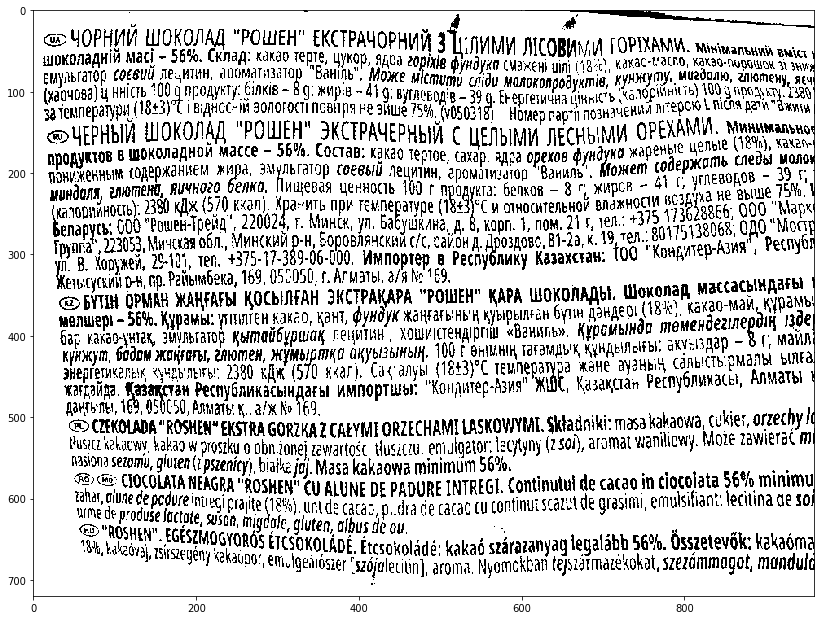

In [48]:
first_image = read_image_and_show(separate_images_path_list[5], 12, 15)

threshold = cv2.adaptiveThreshold(first_image, 
                                  235, 
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY, 95, -35)

threshold += 255 # To convert text to black and background to white

neighbour_denoise = cv2.fastNlMeansDenoising(threshold,None, 45, 15, 1)

show_image(neighbour_denoise, 14, 18)

Obviously not the best solution, but I couldn't achieve better for this image. Probably some advanced techniques could be used.

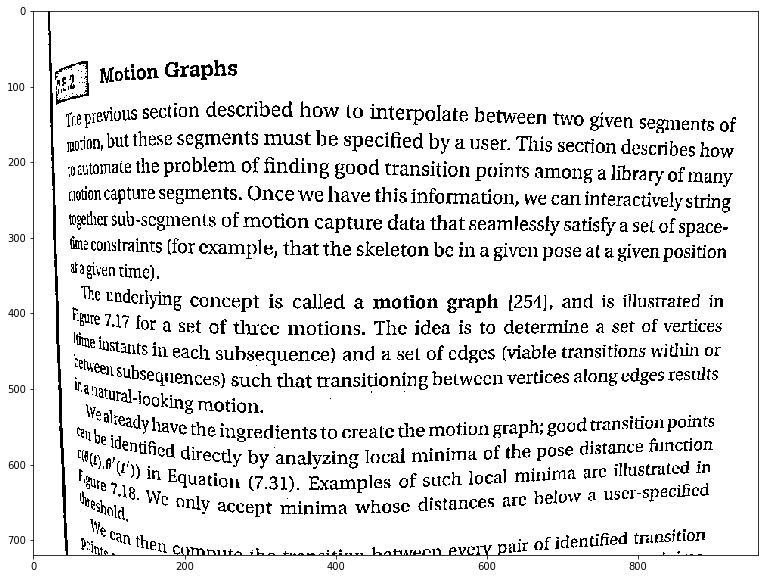

In [148]:
second_image = read_image_and_show(separate_images_path_list[1], 12, 15)
threshold = cv2.adaptiveThreshold(second_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 10)

show_image(threshold, 13, 15)

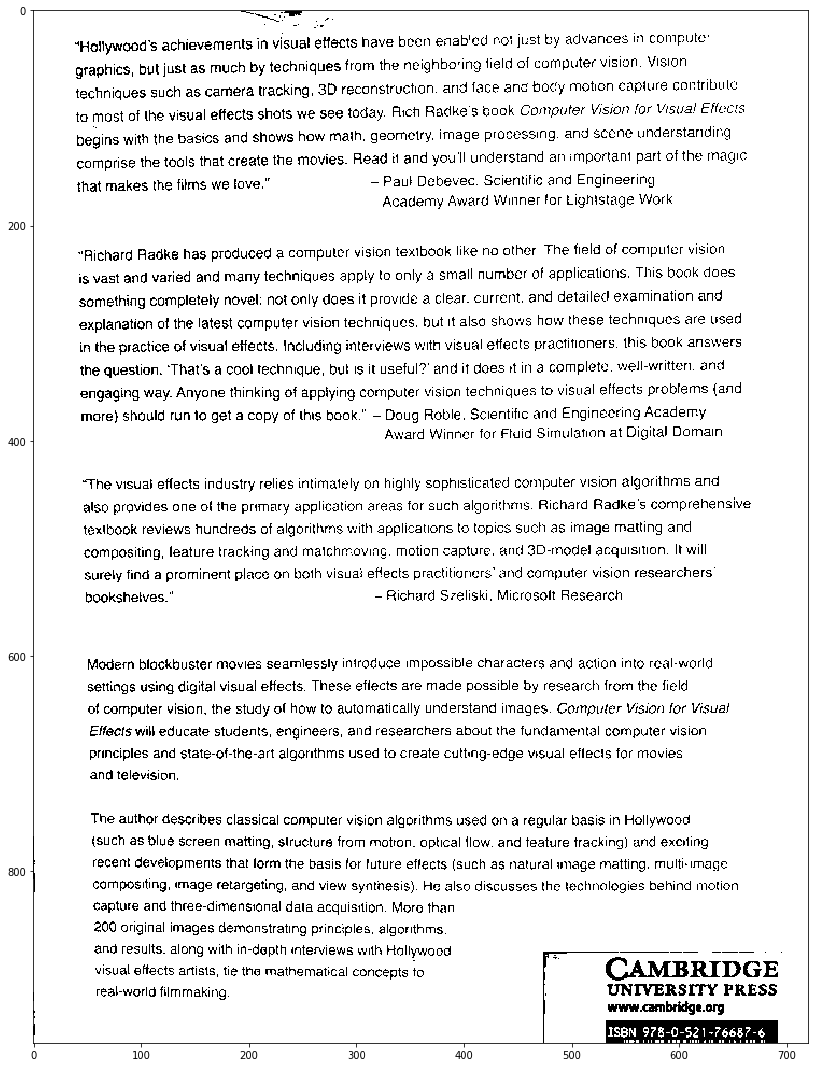

In [149]:
third_image = read_image_and_show(separate_images_path_list[2], 12, 15)
retval, third_image_thresh = cv2.threshold(third_image, 185, 255, cv2.THRESH_BINARY and cv2.THRESH_OTSU)
third_image_thresh += 255

kernel = np.array([[0,1,0], [0,0,0], [0,0,0]], np.uint8) 
third_image_erode = cv2.erode(third_image_thresh, kernel, iterations=1)

show_image(third_image_erode, 16, 19)

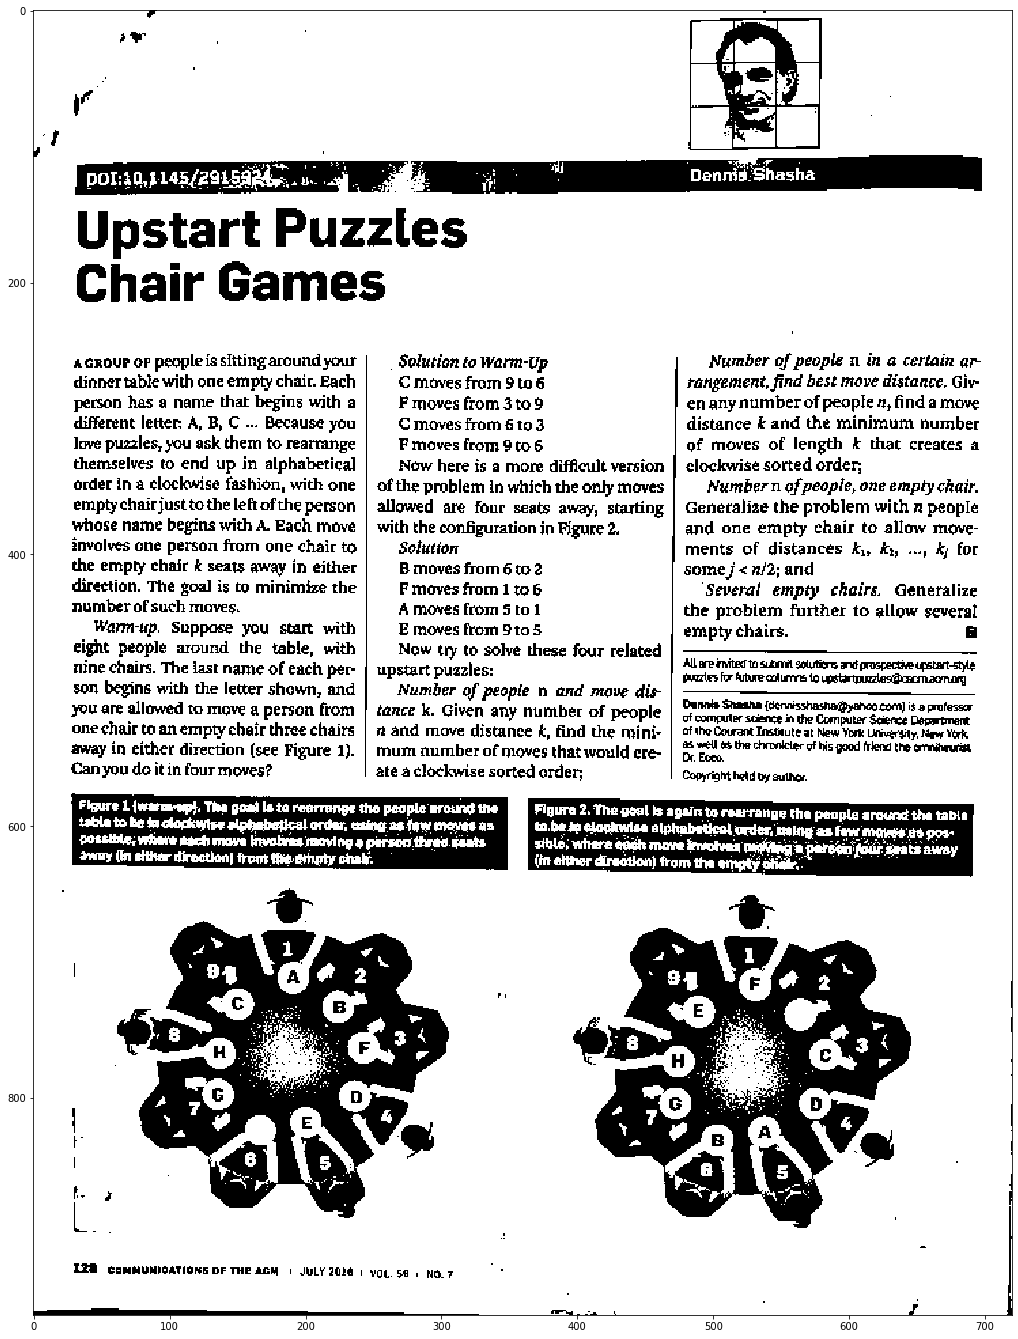

In [822]:
fourth_image = read_image_and_show(separate_images_path_list[3], 12, 15)
threshold = cv2.adaptiveThreshold(fourth_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 15)
show_image(threshold, 20, 24)

In [ ]:
fifth_image = read_image_and_show(separate_images_path_list[4], 12, 15)
_, threshold = cv2.threshold(fifth_image, 155, 255, cv2.THRESH_BINARY)
threshold += 255
show_image(threshold, 10, 12)

Could not find appropriate solution for bird image.

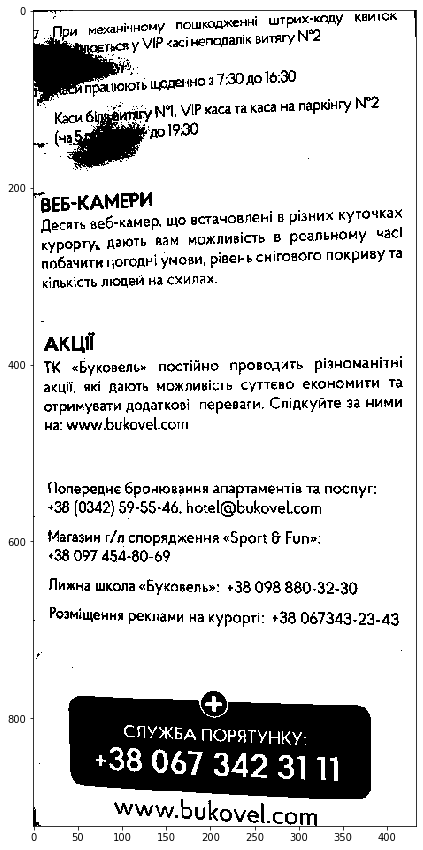

In [152]:
sixth_image = read_image_and_show(separate_images_path_list[5], 12, 15)

retval, sixth_image_threshold = cv2.threshold(sixth_image, 105, 255, cv2.THRESH_BINARY and cv2.THRESH_OTSU)
sixth_image_threshold += 255

show_image(sixth_image_threshold, 13, 15)

Obviously not the best solution since some empty spaces are triggered as segments.